# Avaliação Inicial de Ciência dos dados 

## 2020 - 2o. semestre
___


___
## Índice

- [Cereal: base de dados](#cereal)
- [Questão 1](#q1)
- [Questão 2](#q2)
- [Questão 3](#q3)
- [Questão 4](#q4)
- [Questão 5](#q5)
___

<div id="cereal"></div>

## Cereal

Entre as muitas competições disponíveis na plataforma Kaggle, encontra-se essa com informações nutricionais de quase 80 cereais conforme apresentado neste [link](https://www.kaggle.com/crawford/80-cereals).

A base de dados apresentada no arquivo `cereal.xlsx` contém informação de quase 80 cereais para os quais foram mensurados as seguintes informações (os nomes das variáveis e as categorias serão mantidas em inglês para manter a base de dados original do do Kaggle):
 
 * `name`: nome do cereal
 * `mfr`: fabricante do cereal
    - A = American Home Food Products
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
 * `type`: como deve ser consumido
    - cold = quente
    - hot = frio
 * `calories`: calorias por porção
 * `protein`: gramas de proteínas
 * `fat`: gramas de gordura
 * `sodium`: miligramas de sódio
 * `fiber`: gramas de fibras
 * `carbo`: gramas de carboidrato 
 * `sugars`: gramas de açúcar
 * `potass`: miligramas de potássio
 * `vitamins`: vitaminas e minerais - 0, 25, ou 100, indicando um percentual de acordo com o recomendado pela FDA 
 * `shelf`: posição na prateleira de venda do supermercado (1, 2, ou 3, contado a partir do chão)
 * `weight`: peso, em onças, em uma porção. 
 * `cups`: número de xícaras em um porção  
 * `rating`: um índice de preferência de cereais (possivelmente de algum relatório do consumidor), que varia de 0 (pouco preferido) até 100 (muito preferido).


___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para ter melhor print
from IPython.display import display

Vamos também verificar se o arquivo de dados está no nosso diretório:

In [2]:
import os

filename = 'cereal.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo cereal.csv, tudo certo para prosseguir com a prova!


Se tudo deu certo até agora, vamos prosseguir. Primeiro vamos ler os dados:

In [3]:
dados = pd.read_csv(filename)

In [4]:
dados.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


Definição das variáveis neste momento:

In [5]:
dados.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

O pandas não tem como saber quais variáveis são qualitativas ao carregar os dados. Então precisamos modificar as colunas explicitamente.

Já deixamos isso pronto para você nesta avaliação:

In [6]:
dados['name'] = dados['name'].astype('category')
dados['mfr'] = dados['mfr'].astype('category')
dados['type'] = dados['type'].astype('category')
dados['shelf'] = pd.Categorical(dados.shelf, 
                                 categories = [1,2,3], ordered=True)

***DataFrame* pronto:**

In [7]:
dados.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


<div id="q1"></div>

___
### Questão 1

a) **[1,0 ponto]** Calcule o `rating` médio por `mfr` e indique a marca mais bem avaliada. *Atenção: não use 7 filtros aqui*. 

In [8]:
# Coloque seu código aqui...

In [9]:
# Resposta
dados.groupby(by='mfr').rating.mean().sort_values(ascending=False)
# dados.groupby(by='mfr').rating.mean()

mfr
N    67.968567
A    54.850917
K    44.038462
Q    42.915990
P    41.705744
R    41.542997
G    34.485852
Name: rating, dtype: float64

b) **[1,25 ponto]** Crie um novo *dataframe* chamado `df` contendo:
 * as linhas considerando apenas produtos do fabricante Quaker Oats (variável `mfr`) **e** com gordura maior do que zero (variável `fat`)
 * as colunas `mfr`, `fat` e `rating`
 * imprima o conteúdo dessa base de dados `df` em ordem decrescente por `rating`

In [10]:
# Coloque seu código aqui...

In [11]:
# Resposta
df = dados.loc[(dados.mfr=='Q')&(dados.fat>0),['mfr','fat','rating']]
df.sort_values(by='rating', ascending=False)

,mfr,fat,rating
57,Q,2,50.828392
56,Q,1,49.511874
41,Q,2,45.328074
1,Q,5,33.983679
35,Q,2,21.871292
10,Q,2,18.042851


<div id="q2"></div>

___
### Questão 2

a) **[1,0 ponto]** Construa um histograma para a variavel `potass` com 12 faixas de amplitudes iguais

In [12]:
# Coloque seu código aqui...

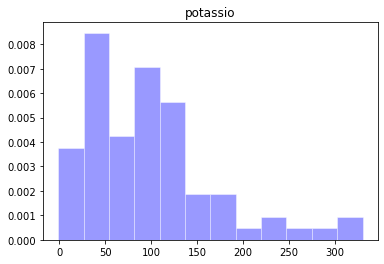

In [27]:
# Resposta
plt.hist(dados.potass, bins=12, color='blue', edgecolor='white', density=True, alpha=0.4)
plt.title('potassio')
plt.show()

b) **[1,0 ponto]** **Observando** o histograma construído no item anterior, é possível afirmar que a maioria dos cereais tem valor de potássio maior do que a média? 

Responda se essa afirmação está **correta** ou **incorreta** embasado apenas no histograma. **Justifique sua resposta.**

In [14]:
# Coloque seu código aqui...

In [15]:
# Resposta
'''
Incorreta pois observada assimetria a direita onde média é maior que mediana. 
Logo a minoria dos cereais tem pelo menos o valor médio.
'''

'\nIncorreta pois observada assimetria a direita onde média é maior que mediana. \nLogo a minoria dos cereais tem pelo menos o valor médio.\n'

<div id="q3"></div>

### Questão 3

a) **[1,0 ponto]** Faça uma tabela cruzada com as frequências absolutas (contagens) considerando a variável `shelf` nas linhas e a variável `mfr` nas colunas.

In [16]:
# Coloque seu código aqui...

In [17]:
# Resposta
pd.crosstab(dados.shelf, dados.mfr)

mfr,A,G,K,N,P,Q,R
shelf,,,,,,,
1,0,6,4,3,2,1,4
2,1,7,7,2,1,3,0
3,0,9,12,1,6,4,4


b) **[1,25 ponto]** Repita a tabela cruzada anterior e utilize o argumento `normalize` adequadamente para responder:
   * Qual produto de cereal com maior % (frequência relativa) na prateleira 1?
   * E com maior % (frequência relativa) na prateleira 3?

In [18]:
# Coloque seu código aqui...

In [19]:
# Resposta
pd.crosstab(dados.shelf, dados.mfr, normalize = 'index')

mfr,A,G,K,N,P,Q,R
shelf,,,,,,,
1,0.000000,0.300000,0.200000,0.150000,0.100000,0.050000,0.200000
2,0.047619,0.333333,0.333333,0.095238,0.047619,0.142857,0.000000
3,0.000000,0.250000,0.333333,0.027778,0.166667,0.111111,0.111111


In [20]:
# Resposta
# 1: G e #3: K

<div id="q4"></div>


### Questão 4

a) **[1,25 ponto]** Utilizando também o comando `plt.subplot()`, construa:
  * um gráfico para descrever a associação entre as variáveis `fat` e `calories`
  * um gráfico para descrever a associação entre as variáveis `rating` e `calories`

b) **[1,0 ponto]** Interprete esses gráficos em termos de associação entre as variáveis envolvidas.

In [21]:
# Coloque seu código aqui...

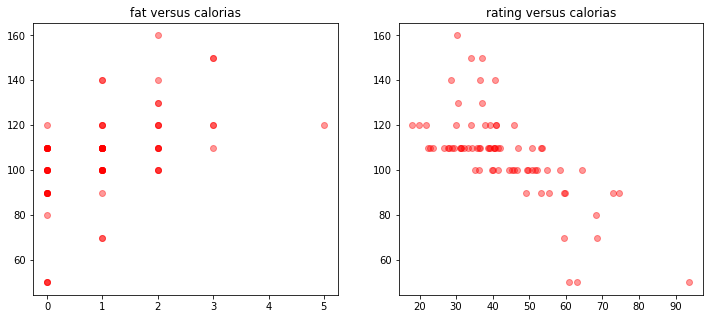

In [22]:
# Resposta
fig = plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(dados.fat, dados.calories, c='red', alpha=0.4)
plt.title(f'fat versus calorias')

plt.subplot(1,2,2)
plt.scatter(dados.rating, dados.calories, c='red', alpha=0.4)
plt.title(f'rating versus calorias')

plt.show()

In [23]:
# Resposta
'''
b) Vemos uma associação positiva entre fat e calories e associação negativa entre rating e calories.
Em ambos, associação moderada.
'''

'\nb) Vemos uma associação positiva entre fat e calories e associação negativa entre rating e calories.\nEm ambos, associação moderada.\n'

<div id="q5"></div>

### Questão 5

**[1,25 ponto]** Avalie a validade da afirmação: "A associação entre `sugar` e `calories` pode ser considerada forte".

Use uma medida numérica para validar ou refutar a afirmação acima.

In [24]:
# Coloque seu código aqui...


In [25]:
# Resposta
dados.sugars.corr(dados.calories)

0.5623402898034883

In [26]:
# Resposta
'''
com base na correlação, não é forte e sim moderada.
'''

'\ncom base na correlação, não é forte e sim moderada.\n'